In [1]:
 from matplotlib import pyplot as plt
from pathlib import Path
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import tensorflowjs as tfjs

In [3]:
data_frame = pd.read_csv("./diabetes.csv")

In [4]:
diab_data = data_frame
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diab_data.loc[:, diab_data.columns != 'Outcome'], 
                                                    diab_data['Outcome'], random_state=7,
                                                    test_size=0.2, shuffle=True)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
y_train_onehot = tf.keras.backend.one_hot(y_train, 2)
y_test_onehot = tf.keras.backend.one_hot(y_test, 2)

In [7]:
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import Add
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Activation

In [8]:
inputs = tf.keras.Input(shape=(8,))  # Returns a placeholder tensor

# A layer instance is callable on a tensor, and returns a tensor.
x = layers.Dense(100, activation='relu', kernel_regularizer='l2')(inputs)
out_ = layers.Dense(2, activation='softmax')(x)


In [9]:
model = tf.keras.Model(inputs=inputs, outputs=out_)

# The compile step specifies the training configuration.
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs
hist = model.fit(X_train_scaled, y_train_onehot, steps_per_epoch=100, epochs=5, 
          validation_data=(X_test_scaled, y_test_onehot), validation_steps=500)

Epoch 1/5
100/100 [==============================] - 2s 22ms/step - loss: 0.6145 - accuracy: 0.7524 - val_loss: 0.5563 - val_accuracy: 0.8312
Epoch 2/5
100/100 [==============================] - 1s 11ms/step - loss: 0.4881 - accuracy: 0.7859 - val_loss: 0.5202 - val_accuracy: 0.8182
Epoch 3/5
100/100 [==============================] - 1s 11ms/step - loss: 0.4518 - accuracy: 0.7920 - val_loss: 0.5092 - val_accuracy: 0.8247
Epoch 4/5
100/100 [==============================] - 1s 11ms/step - loss: 0.4342 - accuracy: 0.7989 - val_loss: 0.5104 - val_accuracy: 0.8377
Epoch 5/5
100/100 [==============================] - 1s 11ms/step - loss: 0.4230 - accuracy: 0.8054 - val_loss: 0.5173 - val_accuracy: 0.8312


In [10]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


KeyError: 'acc'

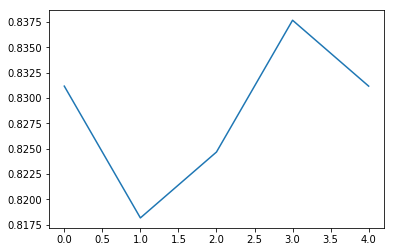

In [12]:
plt.figure()
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['acc'])

In [13]:
model.save("diabetes_model.h5")

In [14]:
curr_model = tf.keras.models.load_model('./diabetes_model.h5')

In [15]:
tfjs.converters.save_keras_model(curr_model, './client/diab_model/')